In [1964]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.cluster import KElbowVisualizer

In [1965]:
df = pd.read_csv("./data/final_average_stats.csv")
df.drop(columns = ["Unnamed: 0", "#"], inplace = True)

In [1966]:
df.rename(columns = {"Pos": "POS", "Height": "HEIGHT", "Weight": "WEIGHT", "Age": "AGE", "zona5attempted": "zona5_attempted"}, inplace = True)

In [1967]:
df['HEIGHT'] = df['HEIGHT'].str.replace('-','.')
df["HEIGHT"] = pd.to_numeric(df["HEIGHT"], downcast="float")
df["HEIGHT"] = df["HEIGHT"] * 0.3048

In [1933]:
df.head()

,PLAYER_NAME,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,...,zona8_attempted,zona8_made,zona9_attempted,zona9_made,zona10_attempted,zona10_made,zona11_attempted,zona11_made,zona12_attempted,zona12_made
0,A.J. Slaughter,GCN,22,24.3,5.0,10.2,0.484,1.7,4.2,0.402,...,32.0,13.0,16.0,7.0,8.0,5.0,5.0,4.0,3.0,1.0
1,Aaron Doornekamp,CAN,31,25.6,2.6,6.1,0.431,2.0,4.6,0.441,...,31.0,13.0,4.0,1.0,25.0,16.0,8.0,2.0,6.0,4.0
2,Aaron Jones,BBB,8,19.7,1.6,3.9,0.419,0.4,1.0,0.375,...,4.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,Achille Polonara,CAJ,33,26.5,4.2,8.8,0.479,1.4,4.1,0.341,...,39.0,12.0,7.0,3.0,14.0,3.0,5.0,3.0,2.0,1.0
4,Adam Hanga,FCB,31,16.1,2.2,3.7,0.578,1.1,2.0,0.541,...,19.0,9.0,2.0,2.0,6.0,3.0,2.0,1.0,5.0,1.0


In [1934]:
df.drop(columns = ["ORB","DRB","FGM", "FGA","3PM", "3PA","FTM", "FTA"], inplace = True)

In [1935]:
df.columns

Index(['PLAYER_NAME', 'Team', 'GP', 'MIN', 'FG%', '3P%', 'FT%', 'TOV', 'PF',
       'REB', 'AST', 'STL', 'BLK', 'PTS', 'POS', 'HEIGHT', 'WEIGHT', 'AGE',
       'zona1_attempted', 'zona1_made', 'zona2_attempted', 'zona2_made',
       'zona3_attempted', 'zona3_made', 'zona4_attempted', 'zona4_made',
       'zona5_attempted', 'zona5_made', 'zona6_attempted', 'zona6_made',
       'zona7_attempted', 'zona7_made', 'zona8_attempted', 'zona8_made',
       'zona9_attempted', 'zona9_made', 'zona10_attempted', 'zona10_made',
       'zona11_attempted', 'zona11_made', 'zona12_attempted', 'zona12_made'],
      dtype='object')

In [1936]:
for i in range(1, 13):
    df[f"% ZONA{i}"] = df[f"zona{i}_made"] / df[f"zona{i}_attempted"]

In [1937]:
df = df.loc[df["GP"] > 8]
df = df.loc[df["MIN"] > 10]

In [1938]:
df.fillna(0, inplace = True)

In [1939]:
df.drop_duplicates(subset = ["PLAYER_NAME"], inplace = True)

In [1940]:
triples = [1,3,5,8,10,12]
mid_range = [2,4,9,11]
paint = [6,7]
for i in triples:
    df[f"% ZONA{i}"] = df[f"% ZONA{i}"] * 1.5
    
for m in mid_range:
    df[f"% ZONA{m}"] = df[f"% ZONA{m}"] * 1
    
for p in paint:
    df[f"% ZONA{p}"] = df[f"% ZONA{p}"] * 0.5


In [1943]:
X = df.drop(columns = ["PLAYER_NAME", "Team", "GP", "POS", "WEIGHT", "AGE", "MIN"])

### Hasta aquí todo bien

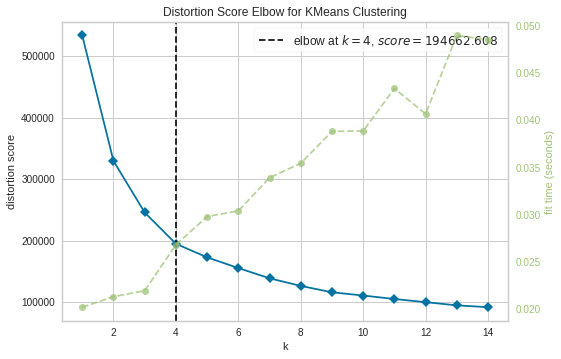

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1944]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [1945]:
nClust = 4
km = KMeans(n_clusters=nClust, init='random', n_init=10, random_state=0)
y_km = km.fit_predict(X)



In [1946]:
y_km

array([1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 3, 1, 3, 2, 2, 2, 2, 1, 0,
       0, 1, 3, 2, 3, 1, 2, 2, 0, 3, 2, 1, 2, 2, 1, 0, 1, 1, 2, 3, 2, 1,
       1, 2, 2, 0, 2, 1, 2, 0, 3, 2, 0, 2, 0, 2, 2, 2, 3, 3, 3, 2, 2, 2,
       2, 2, 1, 3, 1, 1, 3, 2, 0, 3, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 0, 2,
       1, 3, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 3, 1, 1, 0, 2, 3,
       2, 1, 1, 1, 2, 3, 1, 1, 3, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 3, 0,
       3, 3, 3, 2, 0, 2, 3, 3, 2, 2, 3, 0, 0, 3, 3, 2, 1, 1, 3, 3, 3, 2,
       2, 3, 1, 3, 3, 2, 1, 2, 1, 2, 3, 3, 2, 2, 2, 3, 1, 2, 3, 3, 2, 2,
       2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2, 1, 3, 2, 1, 2, 1,
       2, 3, 2, 2, 1, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 0, 1, 3, 2, 2, 2,
       2, 2, 3, 2, 3, 3, 3], dtype=int32)

In [1947]:
df['Cluster'] = y_km

In [1948]:
cluster0 = df.loc[df["Cluster"] == 0]
list(cluster0.PLAYER_NAME)

['Aleksa Avramovic',
 'Angel Delgado',
 'Ante Tomic',
 'Bojan Dubljevic',
 'Christian Eyenga',
 'Dario Brizuela',
 'Dejan Kravic',
 'Dino Radoncic',
 'Dylan Ennis',
 'Giorgi Shermadini',
 'James Feldeine',
 'Jasiel Rivero',
 'Jordan Davis',
 'Leonardo Meindl',
 'Marcelinho Huertas',
 'Melo Trimble',
 'Nemanja Radovic',
 'Nenad Dimitrijevic',
 'Scott Eatherton',
 'Viny Okouo']

In [1949]:
cluster0.median()

GP                   34.000000
MIN                  23.450000
FG%                   0.499000
3P%                   0.272000
FT%                   0.752500
TOV                   1.900000
PF                    2.050000
REB                   4.700000
AST                   2.100000
STL                   0.950000
BLK                   0.250000
PTS                  12.800000
HEIGHT                2.042160
WEIGHT              212.500000
AGE                  28.000000
zona1_attempted       0.500000
zona1_made            0.000000
zona2_attempted       9.500000
zona2_made            2.000000
zona3_attempted       5.000000
zona3_made            1.500000
zona4_attempted       7.000000
zona4_made            3.000000
zona5_attempted      21.500000
zona5_made            6.500000
zona6_attempted      82.000000
zona6_made           47.000000
zona7_attempted      90.000000
zona7_made           52.000000
zona8_attempted      21.000000
zona8_made            5.500000
zona9_attempted       9.000000
zona9_ma

In [1952]:
cluster1 = df.loc[df["Cluster"] == 1]
list(cluster1.PLAYER_NAME)

['A.J. Slaughter',
 'Achille Polonara',
 'Alberto Abalde',
 'Alec Brown',
 'Alec Peters',
 'Alex Abrines',
 'Andrew Albicy',
 'Arnoldas Kulboka',
 'Axel Bouteille',
 'Bruno Fitipaldo',
 'Chris Czerapowicz',
 'Clevin Hannah',
 'Conner Frankamp',
 'D.J. Strawberry',
 'Dani Perez',
 'David Jelinek',
 'Ferran Bassas',
 'Francis Alonso',
 'Frankie Ferrari',
 'J.JJ Barea',
 'Jan Span',
 'Jaycee Carroll',
 'Jaylon Brown',
 'Jeremy Senglin',
 'John Jenkins',
 'John Roberson',
 'Johnny Dee',
 'Jonathan Rousselle',
 'Jonathan Tabu',
 'Kassius Robertson',
 'Ken Horton',
 'Klemen Prepelic',
 'Kyle Kuric',
 'Laurynas Beliauskas',
 'Luca Vildoza',
 'Lucas Faggiano',
 'Ludde Hakanson',
 'Makai Mason',
 'Nicolas Brussino',
 'Nicolas Laprovittola',
 'Omar Cook',
 'Pau Ribas',
 'Pere Tomas',
 'Robin Benzing',
 'Sam Van Rossom',
 'Sasu Salin',
 'Sergio Llull',
 'Stan Okoye',
 'T.J. Campbell',
 'Thaddus McFadden',
 'Tomas Dimsa',
 'Vitor Benite']

In [1953]:
cluster1.median()

GP                   31.500000
MIN                  22.350000
FG%                   0.424500
3P%                   0.369000
FT%                   0.828000
TOV                   1.450000
PF                    2.000000
REB                   1.900000
AST                   2.200000
STL                   0.700000
BLK                   0.100000
PTS                   9.550000
HEIGHT                1.920240
WEIGHT              188.000000
AGE                  29.000000
zona1_attempted       1.000000
zona1_made            0.500000
zona2_attempted       9.000000
zona2_made            4.000000
zona3_attempted       9.000000
zona3_made            3.000000
zona4_attempted       9.500000
zona4_made            3.000000
zona5_attempted      39.000000
zona5_made           14.000000
zona6_attempted      32.000000
zona6_made           16.000000
zona7_attempted      31.000000
zona7_made           16.000000
zona8_attempted      38.500000
zona8_made           13.500000
zona9_attempted       9.000000
zona9_ma

In [1954]:
cluster2 = df.loc[df["Cluster"] == 2]
list(cluster2.PLAYER_NAME)

['Aaron Doornekamp',
 'Adam Hanga',
 'Adam Waczynski',
 'Albert Oliver',
 'Albert Ventura',
 'Alberto Diaz',
 'Aleksandar Cvetkovic',
 'Alex Reyes',
 'Alex Suarez',
 'Alex Tyus',
 'Alvaro Munoz',
 'Artsiom Parakhouski',
 'Bandja Sy',
 'Beka Burjanadze',
 'Brandone Francis',
 'Carlos Alocen',
 'Carlos Suarez',
 'Conor Morgan',
 'D.J. Seeley',
 'Daniel Diez',
 'Daniel Garcia',
 'David DiLeo',
 'Deividas Dulkys',
 'Derrick Williams',
 'Dovydas Giedraitis',
 'Dzherom Rendl',
 'Edgar Vicedo',
 'Edwin Jackson',
 'Emir Sulejmanovic',
 'Eulis Baez',
 'Fabien Causeur',
 'Facundo Campazzo',
 'Fernando San Emeterio',
 'Gal Mekel',
 'Guillem Jou',
 'Guillem Vives',
 'Haukur Palsson',
 'Ilimane Diop',
 'Isaiah Taylor',
 'James Webb III',
 'Jason Thompson',
 'Javier Beiran',
 'Jeffery Taylor',
 'Jerome Jordan',
 'Joan Sastre',
 'Joel Parra',
 'John Shurna',
 'Jovan Novak',
 'Kartal Ozmizrak',
 'Kwan Cheatham, Jr.',
 'Leandro Bolmaro',
 'Leo Westermann',
 'Louis Labeyrie',
 'Malcolm Thomas',
 'Malik 

In [1955]:
cluster2.median()

GP                   23.000000
MIN                  17.000000
FG%                   0.446000
3P%                   0.352000
FT%                   0.778000
TOV                   0.900000
PF                    1.700000
REB                   2.400000
AST                   0.900000
STL                   0.600000
BLK                   0.100000
PTS                   5.700000
HEIGHT                2.011680
WEIGHT              205.000000
AGE                  28.000000
zona1_attempted       1.000000
zona1_made            0.000000
zona2_attempted       4.000000
zona2_made            2.000000
zona3_attempted       4.000000
zona3_made            1.000000
zona4_attempted       3.000000
zona4_made            1.000000
zona5_attempted      11.000000
zona5_made            4.000000
zona6_attempted      18.000000
zona6_made            8.000000
zona7_attempted      17.000000
zona7_made            9.000000
zona8_attempted      10.000000
zona8_made            4.000000
zona9_attempted       1.000000
zona9_ma

In [1956]:
cluster3 = df.loc[df["Cluster"] == 3]
list(cluster3.PLAYER_NAME)

['Alessandro Gentile',
 'Alex Renfroe',
 'Artem Pustovyi',
 'Augusto Lima',
 'Brandon Davies',
 'Cory Higgins',
 'Deon Thompson',
 'Edy Tavares',
 'Elias Harris',
 'Emanuel Cate',
 'Fran Guerra',
 'Gabriel Deck',
 'Goran Huskic',
 'Jaime Echenique',
 'Jaime Fernandez',
 'Jake Cohen',
 'Jake Wiley',
 'Jaroslaw Zyskowski',
 'Jonathan Barreiro',
 'Juan Vaulet',
 'Kyle Alexander',
 'Laurynas Birutis',
 'Marc Garcia',
 'Martin Hermannsson',
 'Martynas Sajus',
 'Matt Costello',
 'Mike Daum',
 'Mike Tobey',
 'Nemanja Djurisic',
 'Nicholas Kay',
 'Nick Calathes',
 'Nikola Kalinic',
 'Nikola Mirotic',
 'Obi Emegano',
 'Oliver Stevic',
 'Ondrej Balvin',
 'Oriol Pauli',
 'Pierre Oriola',
 'Pierria Henry',
 'Regimantas Miniotas',
 'Rokas Giedraitis',
 'Rolands Smits',
 'Seth Hinrichs',
 'Simon Birgander',
 'Steven Enoch',
 'Tim Abromaitis',
 'Tonye Jekiri',
 'Tryggvi Hlinason',
 'B. Olumuyiwa',
 'Tyler Cavanaugh',
 'Victor Arteaga',
 'Vladimir Brodziansky',
 'Yakuba Ouattara',
 'Youssoupha Fall',


In [1957]:
cluster3.median()

GP                   31.500000
MIN                  20.950000
FG%                   0.539000
3P%                   0.346500
FT%                   0.742500
TOV                   1.300000
PF                    2.100000
REB                   3.900000
AST                   0.950000
STL                   0.600000
BLK                   0.300000
PTS                   8.700000
HEIGHT                2.072640
WEIGHT              225.000000
AGE                  28.000000
zona1_attempted       0.000000
zona1_made            0.000000
zona2_attempted       5.000000
zona2_made            2.000000
zona3_attempted       1.000000
zona3_made            0.000000
zona4_attempted       4.000000
zona4_made            1.500000
zona5_attempted      12.000000
zona5_made            3.000000
zona6_attempted      47.000000
zona6_made           27.000000
zona7_attempted      48.000000
zona7_made           27.000000
zona8_attempted      10.500000
zona8_made            3.000000
zona9_attempted       3.500000
zona9_ma

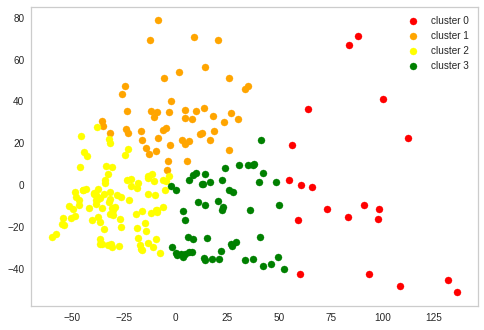

In [1958]:

# Visualization
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

colormaps = ["red", "orange", "yellow", "green", "blue", "black", 'lightgreen','dodgerblue','navy','mediumpurple','pink','hotpink','oldlace','aqua','slategrey','palegreen','m','indianred','orchid']

for iCluster in range(0, nClust):
    plt.scatter(principalComponents[y_km == iCluster, 0], principalComponents[y_km == iCluster, 1], s=50, c=colormaps[iCluster],  label='cluster '+ str(iCluster))
plt.legend(scatterpoints=1,loc='best')
plt.grid()
plt.show()

In [1959]:
len(y_km)

227

In [1960]:
cluster0 = df.loc[df["Cluster"] == 0]
cluster0

,PLAYER_NAME,Team,GP,MIN,FG%,3P%,FT%,TOV,PF,REB,...,% ZONA4,% ZONA5,% ZONA6,% ZONA7,% ZONA8,% ZONA9,% ZONA10,% ZONA11,% ZONA12,Cluster
14,Aleksa Avramovic,EST,35,29.7,0.437,0.322,0.834,1.9,2.1,2.9,...,0.235294,0.358696,0.258065,0.239130,0.475610,0.333333,0.600000,0.571429,0.50,0
27,Angel Delgado,EST,33,20.9,0.650,0.000,0.396,1.4,2.7,7.7,...,0.000000,0.000000,0.320513,0.297101,0.000000,0.000000,0.000000,0.000000,0.00,0
28,Ante Tomic,JOV,34,23.0,0.545,0.200,0.750,2.1,1.6,6.1,...,0.500000,0.000000,0.292035,0.257937,0.375000,0.800000,0.000000,0.166667,0.00,0
39,Bojan Dubljevic,VAL,27,21.6,0.519,0.446,0.882,2.2,1.6,5.7,...,0.000000,0.517241,0.300000,0.285714,0.750000,0.000000,0.750000,0.000000,0.00,0
51,Christian Eyenga,MON,34,24.1,0.457,0.271,0.577,1.1,2.0,3.6,...,0.166667,0.321429,0.243902,0.235294,0.346154,0.222222,0.272727,0.571429,1.50,0
61,Dario Brizuela,UNI,32,23.9,0.464,0.357,0.768,1.7,1.9,1.6,...,0.555556,0.472222,0.343750,0.256757,0.486486,0.458333,0.617647,0.250000,0.30,0
65,Dejan Kravic,SPB,33,20.7,0.600,0.000,0.530,1.6,2.2,4.6,...,0.000000,0.000000,0.288793,0.281915,0.000000,0.000000,0.000000,0.000000,0.00,0
68,Dino Radoncic,GBC,34,28.0,0.451,0.255,0.755,1.9,1.7,5.5,...,0.666667,0.403846,0.282895,0.266667,0.450000,0.333333,0.562500,0.285714,0.00,0
70,Dylan Ennis,ZAR,34,29.4,0.491,0.335,0.763,2.5,1.8,3.2,...,0.375000,0.687500,0.308989,0.304348,0.333333,0.444444,0.617647,0.727273,0.75,0
99,Giorgi Shermadini,CAN,34,23.5,0.667,0.000,0.901,2.2,2.0,5.4,...,1.000000,0.000000,0.299213,0.316964,0.000000,0.000000,0.000000,1.000000,0.00,0


In [1961]:
cluster1 = df.loc[df["Cluster"] == 1]
cluster1

,PLAYER_NAME,Team,GP,MIN,FG%,3P%,FT%,TOV,PF,REB,...,% ZONA4,% ZONA5,% ZONA6,% ZONA7,% ZONA8,% ZONA9,% ZONA10,% ZONA11,% ZONA12,Cluster
0,A.J. Slaughter,GCN,22,24.3,0.484,0.402,0.839,1.5,2.1,2.3,...,0.333333,0.562500,0.291667,0.236842,0.609375,0.437500,0.937500,0.800000,0.5000,1
3,Achille Polonara,CAJ,33,26.5,0.479,0.341,0.685,1.2,1.8,5.5,...,0.333333,0.600000,0.238636,0.300000,0.461538,0.428571,0.321429,0.600000,0.7500,1
9,Alberto Abalde,RMB,30,19.3,0.442,0.438,0.833,0.8,1.2,2.6,...,0.166667,0.700000,0.257143,0.209677,0.634615,1.000000,0.750000,0.500000,0.0000,1
11,Alec Brown,EST,35,22.9,0.436,0.397,0.750,0.8,3.1,3.9,...,0.500000,0.535714,0.238095,0.218750,0.685714,0.285714,0.900000,0.250000,0.5000,1
12,Alec Peters,CAJ,32,21.8,0.471,0.387,0.919,1.2,2.0,3.9,...,0.285714,0.525000,0.311111,0.275000,0.589286,0.200000,0.681818,0.533333,0.9375,1
17,Alex Abrines,FCB,29,20.7,0.519,0.465,0.914,0.6,2.2,2.9,...,0.500000,0.576923,0.323529,0.200000,0.666667,0.333333,0.692308,0.666667,1.1250,1
26,Andrew Albicy,GCN,32,23.9,0.393,0.360,0.778,2.5,2.1,1.5,...,0.400000,0.583333,0.269231,0.240741,0.488372,0.000000,0.500000,0.000000,0.0000,1
30,Arnoldas Kulboka,BBB,30,22.5,0.435,0.430,0.794,1.0,1.1,3.8,...,0.333333,0.557143,0.200000,0.250000,0.681818,0.333333,0.642857,0.285714,0.7500,1
36,Axel Bouteille,UNI,30,20.4,0.437,0.368,0.844,0.4,0.6,2.0,...,0.421053,0.562500,0.287879,0.279412,0.803571,0.312500,0.375000,0.379310,1.5000,1
44,Bruno Fitipaldo,CAN,33,23.1,0.414,0.333,0.811,2.2,2.3,1.6,...,0.416667,0.695122,0.326923,0.200000,0.453488,0.250000,0.166667,0.166667,0.7500,1


In [1962]:
cluster2 = df.loc[df["Cluster"] == 2]
cluster2

,PLAYER_NAME,Team,GP,MIN,FG%,3P%,FT%,TOV,PF,REB,...,% ZONA4,% ZONA5,% ZONA6,% ZONA7,% ZONA8,% ZONA9,% ZONA10,% ZONA11,% ZONA12,Cluster
1,Aaron Doornekamp,CAN,31,25.6,0.431,0.441,0.778,0.7,2.7,3.5,...,0.250000,0.672414,0.277778,0.181818,0.629032,0.250000,0.960000,0.250000,1.000000,2
4,Adam Hanga,FCB,31,16.1,0.578,0.541,0.703,1.4,1.6,3.4,...,0.666667,0.975000,0.285714,0.321429,0.710526,1.000000,0.750000,0.500000,0.300000,2
5,Adam Waczynski,UNI,34,18.8,0.484,0.468,0.787,0.7,1.6,2.1,...,0.600000,0.552632,0.193548,0.250000,0.535714,0.666667,0.825000,0.800000,0.428571,2
7,Albert Oliver,OBR,31,15.1,0.418,0.390,0.884,1.1,2.1,1.4,...,0.166667,0.500000,0.315789,0.100000,0.625000,0.666667,0.500000,0.000000,1.500000,2
8,Albert Ventura,JOV,32,23.8,0.516,0.482,0.694,0.8,2.2,2.7,...,0.833333,0.473684,0.250000,0.309524,0.750000,0.000000,0.750000,0.333333,0.900000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,William Magarity,GBC,29,14.8,0.386,0.293,0.846,0.6,1.4,2.3,...,0.500000,0.362069,0.285714,0.269231,0.600000,0.400000,0.600000,0.166667,0.000000,2
274,Xabi Oroz,GBC,31,18.8,0.451,0.433,0.429,1.2,1.6,2.1,...,1.000000,0.500000,0.235294,0.229167,0.750000,0.000000,1.000000,0.000000,0.000000,2
275,Xabier Lopez-Arostegui,JOV,24,25.4,0.487,0.412,0.969,1.3,2.0,5.2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
276,Xavi Rabaseda,SPB,29,19.9,0.433,0.312,0.775,0.9,1.6,3.4,...,0.333333,0.187500,0.309524,0.200000,0.300000,0.000000,0.576923,0.500000,0.857143,2


In [1963]:
cluster4 = df.loc[df["Cluster"] == 4]
cluster4

,PLAYER_NAME,Team,GP,MIN,FG%,3P%,FT%,TOV,PF,REB,...,% ZONA4,% ZONA5,% ZONA6,% ZONA7,% ZONA8,% ZONA9,% ZONA10,% ZONA11,% ZONA12,Cluster
